

# Objective
The goal of this data analysis project using sql would be to identify opportunities to increase the occupancy rate on low-performing flights, which can ultimately lead to increased profitability for the airline.


In [1]:
import pandas as pd
import numpy as np 
import pyodbc
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [2]:
# connecting to the SSMS SQL Server 

server = 'DESKTOP-RNHKNLA\SQLEXPRESS'
database = 'Airlines_data'

connection_string = (
    f"mssql+pyodbc://@{server}/{database}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
    "&trusted_connection=yes"
)

engine = create_engine(connection_string)

In [3]:
# extracting table names from the database

## This Returns a Pandas Dataframe
tables_names = pd.read_sql_query("SELECT table_name FROM information_schema.tables WHERE table_type = 'BASE TABLE'", engine)

print('List of Tables present in the Database')

tables_list = tables_names['table_name'].to_list()
tables_list

List of Tables present in the Database


['aircrafts_data',
 'boarding_passes',
 'flights',
 'seats',
 'ticket_flights',
 'tickets',
 'airports_data',
 'bookings']

# Data Exploration

In [4]:
aircrafts_data = pd.read_sql_query(f"""SELECT * FROM aircrafts_data""", engine)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""????? 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""????? 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""????? ???...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""??????? A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""??????? A321-...",5600


In [5]:
airports_data = pd.read_sql_query(f"""SELECT * FROM airports_data""", engine)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""??????""}","{""en"": ""Yakutsk"", ""ru"": ""??????""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""??????""}","{""en"": ""Mirnyj"", ""ru"": ""??????""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""?????...","{""en"": ""Khabarovsk"", ""ru"": ""?????????""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""???????""}","{""en"": ""Petropavlovsk"", ""ru"": ""?????????????-?...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""???...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""????-??????...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [6]:
boarding_passes = pd.read_sql_query(f"""SELECT * FROM boarding_passes""", engine)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [7]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings """, engine)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [8]:
flights = pd.read_sql_query(f"""SELECT * FROM flights  """, engine)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [9]:
seats = pd.read_sql_query(f"""SELECT * FROM seats  """, engine)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [10]:
ticket_flights = pd.read_sql_query(f"""SELECT * FROM ticket_flights  """, engine)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005434466576,6582,Economy,23000
1,0005434466582,6582,Economy,23000
2,0005434466580,6582,Economy,20900
3,0005434466574,6582,Economy,20900
4,0005435312842,6582,Economy,20900


In [11]:
tickets = pd.read_sql_query(f"""SELECT * FROM tickets  """, engine)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


### Checking the Dtypes of each columns 

In [12]:
for table in tables_list:
    print(f"\nTable: {table}")
    
    query = f"SELECT * FROM {table}"
    df = pd.read_sql_query(query, engine)
    
    print(df.dtypes)


Table: aircrafts_data
aircraft_code    object
model            object
range             int64
dtype: object

Table: boarding_passes
ticket_no      object
flight_id       int64
boarding_no     int64
seat_no        object
dtype: object

Table: flights
flight_id               int64
flight_no              object
scheduled_departure    object
scheduled_arrival      object
departure_airport      object
arrival_airport        object
status                 object
aircraft_code          object
actual_departure       object
actual_arrival         object
dtype: object

Table: seats
aircraft_code      object
seat_no            object
fare_conditions    object
dtype: object

Table: ticket_flights
ticket_no          object
flight_id           int64
fare_conditions    object
amount              int64
dtype: object

Table: tickets
ticket_no       object
book_ref        object
passenger_id    object
dtype: object

Table: airports_data
airport_code    object
airport_name    object
city            objec

### Checking Missing Values

In [13]:
# checking for missing values in each column for every table
for table in tables_list:
    print(f'\nMissing Values in table {table}')
    df_table = pd.read_sql_query(f"""SELECT * FROM {table}""", engine)
    print(df_table.isnull().sum())



Missing Values in table aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

Missing Values in table boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Missing Values in table flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Missing Values in table seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Missing Values in table ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

Missing Values in table tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64

Missing Values in table airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0

# Analysis

**How many planes have more than 100 seats?**

In [14]:
pd.read_sql_query(f"""SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                        GROUP BY aircraft_code 
                        HAVING COUNT(*) > 100 
                        ORDER BY num_seats DESC""", engine)

,aircraft_code,num_seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


**How the number of tickets booked and total amount earned changed with the time.**


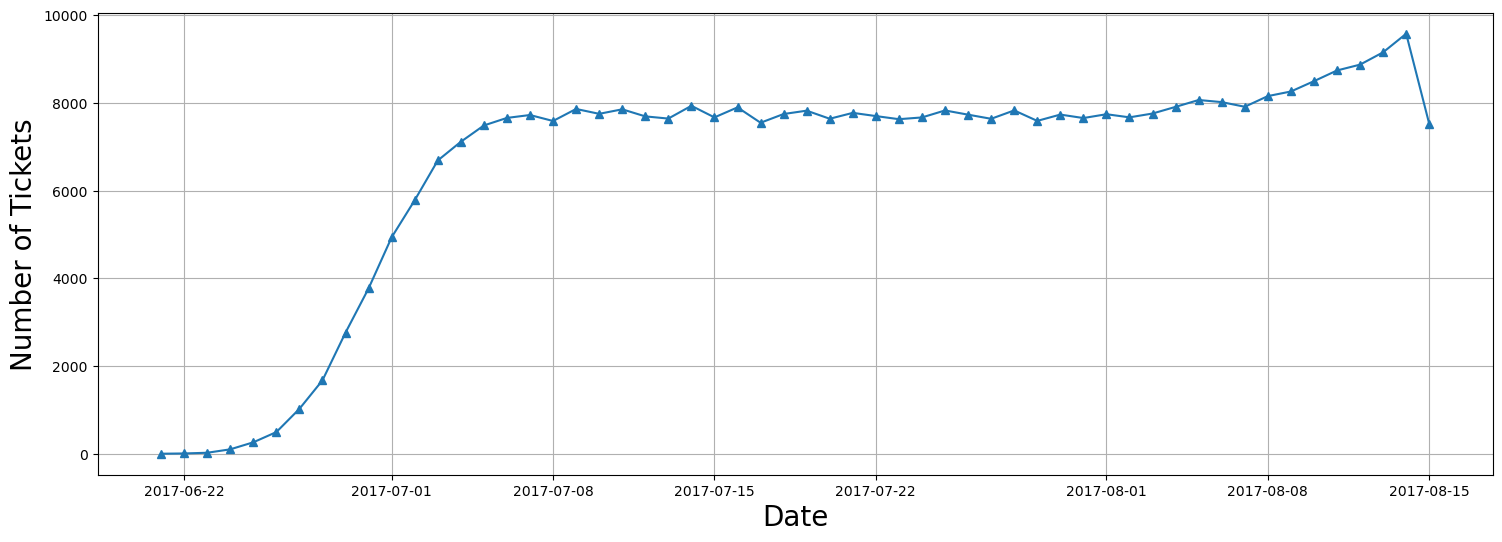

In [15]:
tickets = pd.read_sql_query(f"""SELECT *
                                    FROM tickets as t
                                    INNER JOIN bookings as b
                                    ON t.book_ref = b.book_ref;""", engine)

tickets['book_date'] = pd.to_datetime(tickets['book_date'])             # changing the Data types of date from object to date time
tickets['date'] = tickets['book_date'].dt.date                          # Keeping Only Dates in the Columns

x =  tickets.groupby('date')[['date']].count()


plt.figure(figsize = (18,6))
plt.plot(x.index,x['date'], marker = '^')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of Tickets', fontsize = 20)
plt.grid('b')
plt.show()

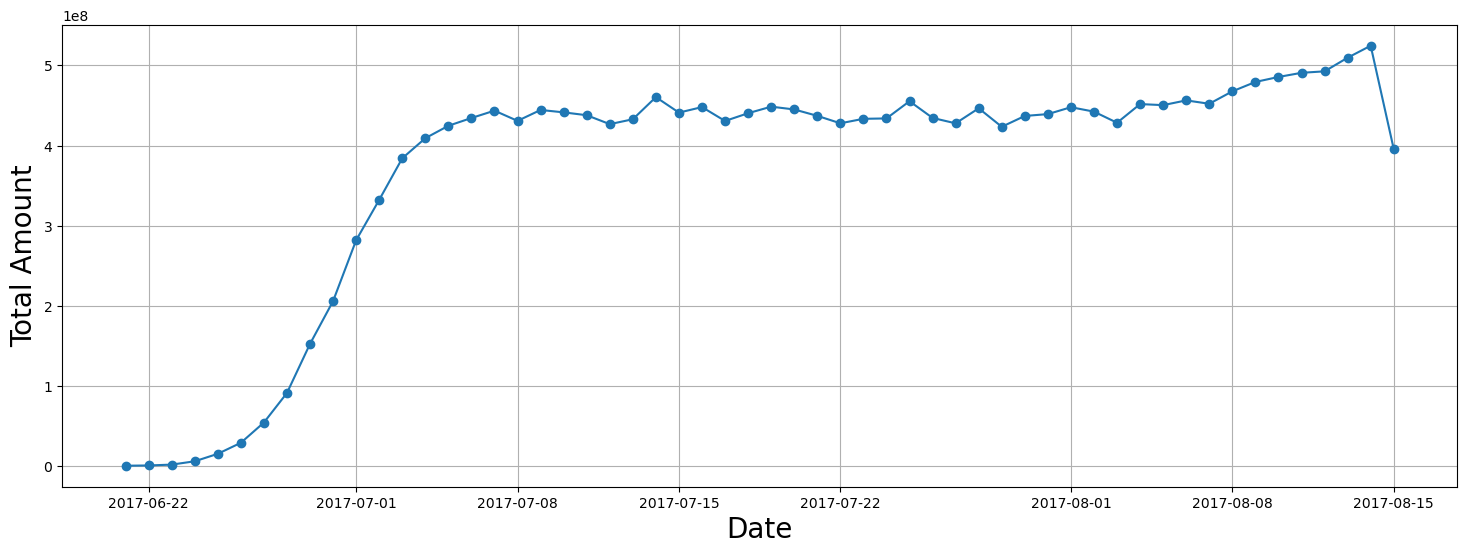

In [16]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings""", engine)

bookings['book_date'] = pd.to_datetime(bookings['book_date'])                # changing the Data types of date from object to date time
bookings['date'] = bookings['book_date'].dt.date                              # Keeping Only Dates in the Columns

y =  bookings.groupby('date')[['total_amount']].sum()                          


plt.figure(figsize = (18,6))
plt.plot(y.index,y['total_amount'], marker = 'o')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Total Amount', fontsize = 20)
plt.grid('b')
plt.show()

**Calculate the average charges for each aircraft with different fare conditions.**

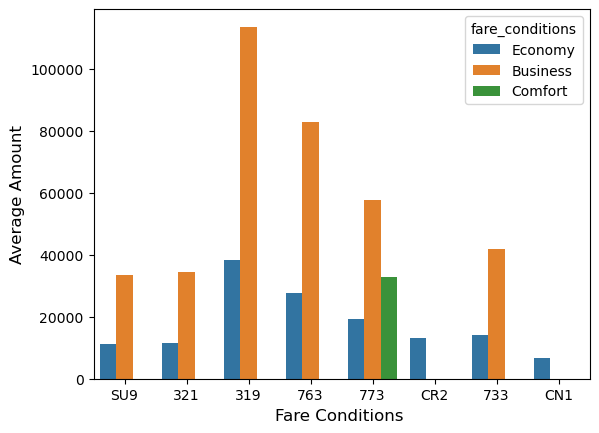

In [17]:
df = pd.read_sql_query("""SELECT fare_conditions, aircraft_code, AVG(amount) as avg_amount FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code, fare_conditions""", engine)

sns.barplot(data = df, x = 'aircraft_code', y ='avg_amount', hue = 'fare_conditions')
plt.xlabel('Fare Conditions ', fontsize = 12)
plt.ylabel('Average Amount', fontsize = 12)
plt.show()

# Analyzing occupancy rate

**For each aircraft, calculate the total revenue per year and the average revenue per ticket.**

In [18]:
pd.set_option('display.float_format', str)

In [19]:
pd.read_sql_query(f"""SELECT aircraft_code, total_revenue, ticket_count, total_revenue/ticket_count as avg_revenue_per_ticket
                        FROM 
                        (SELECT aircraft_code, COUNT(*) as ticket_count, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code) as tab1 """, engine)

,aircraft_code,total_revenue,ticket_count,avg_revenue_per_ticket
0,319,2706163100,52853,51201
1,CN1,96373800,14672,6568
2,733,1426552100,86102,16568
3,321,1638164100,107129,15291
4,CR2,1982760500,150122,13207
5,773,3431205500,144376,23765
6,SU9,5114484700,365698,13985
7,763,4371277100,124774,35033


**Calculate the average occupancy per aircraft.**

In [20]:
occupancy_rate = pd.read_sql_query("""
SELECT a.aircraft_code, 
       AVG(a.seats_count) AS booked_seats, 
       b.num_seats, 
       AVG(a.seats_count) * 1.0 / b.num_seats AS occupancy_rate
FROM (
    SELECT f.aircraft_code, f.flight_id, COUNT(*) AS seats_count
    FROM boarding_passes bp
    JOIN flights f ON bp.flight_id = f.flight_id
    GROUP BY f.aircraft_code, f.flight_id
) a
JOIN (
    SELECT aircraft_code, COUNT(*) AS num_seats
    FROM seats
    GROUP BY aircraft_code
) b
ON a.aircraft_code = b.aircraft_code
GROUP BY a.aircraft_code, b.num_seats
""", engine)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53,116,0.456896551724
1,321,88,170,0.517647058823
2,733,80,130,0.615384615384
3,763,113,222,0.509009009009
4,773,264,402,0.65671641791
5,CN1,6,12,0.5
6,CR2,21,50,0.42
7,SU9,56,97,0.577319587628


**Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.**


In [21]:
occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1

total_revenue = pd.read_sql_query("""SELECT aircraft_code, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code""", engine)

occupancy_rate['Inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Inc occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Total Annual Turnover
0,319,53,116,0.456896551724,0.5025862068964,2976779409.9999995
1,321,88,170,0.517647058823,0.5694117647053,106011180.0
2,733,80,130,0.615384615384,0.6769230769224001,1569207310.0
3,763,113,222,0.509009009009,0.5599099099099001,1801980510.0000002
4,773,264,402,0.65671641791,0.7223880597010001,2181036550.0
5,CN1,6,12,0.5,0.55,3774326050.0000005
6,CR2,21,50,0.42,0.46199999999999997,5625933170.0
7,SU9,56,97,0.577319587628,0.6350515463908,4808404810.0
